Train: (19659, 15) Val: (4213, 15) Test: (4213, 15)

=== Logistic Regression ===
Classification Report (LogReg):
               precision    recall  f1-score   support

      Normal       0.97      0.77      0.86      3737
        AFib       0.32      0.84      0.46       476

    accuracy                           0.78      4213
   macro avg       0.65      0.80      0.66      4213
weighted avg       0.90      0.78      0.82      4213

Confusion Matrix (LogReg):
 [[2884  853]
 [  78  398]]
ROC-AUC (LogReg): 0.8906337488166259

=== Random Forest ===
Classification Report (RF):
               precision    recall  f1-score   support

      Normal       0.98      1.00      0.99      3737
        AFib       0.96      0.87      0.91       476

    accuracy                           0.98      4213
   macro avg       0.97      0.93      0.95      4213
weighted avg       0.98      0.98      0.98      4213

Confusion Matrix (RF):
 [[3722   15]
 [  64  412]]
ROC-AUC (RF): 0.9974682540931812


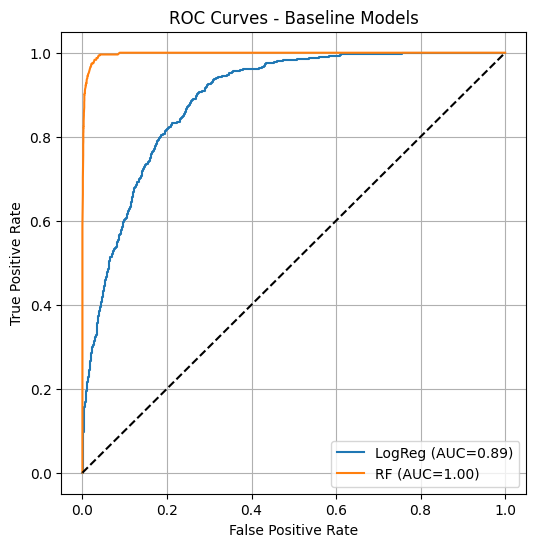

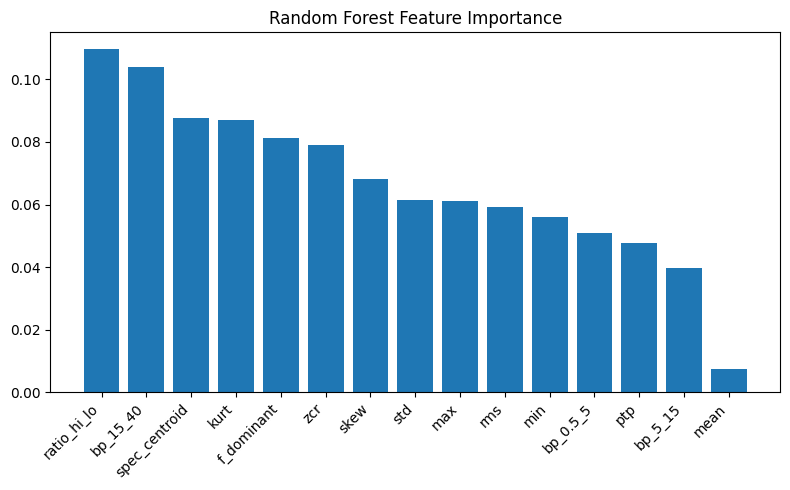

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

# load data , create x/y
d = np.load("mitdb_features_v1.npz", allow_pickle=True)
Xtr, Xva, Xte = d["X_train_feat"], d["X_val_feat"], d["X_test_feat"]
ytr, yva, yte = d["y_train"], d["y_val"], d["y_test"]
feature_names = d["feature_names"]

print("Train:", Xtr.shape, "Val:", Xva.shape, "Test:", Xte.shape)

# LR model
print("\n=== Logistic Regression ===")
logreg = LogisticRegression(max_iter=1000, class_weight="balanced")
logreg.fit(Xtr, ytr)

y_pred_lr = logreg.predict(Xte)
y_prob_lr = logreg.predict_proba(Xte)[:,1]

print("Classification Report (LogReg):\n", classification_report(yte, y_pred_lr, target_names=["Normal","AFib"]))
print("Confusion Matrix (LogReg):\n", confusion_matrix(yte, y_pred_lr))
print("ROC-AUC (LogReg):", roc_auc_score(yte, y_prob_lr))

# RF
print("\n=== Random Forest ===")
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, class_weight="balanced")
rf.fit(Xtr, ytr)

y_pred_rf = rf.predict(Xte)
y_prob_rf = rf.predict_proba(Xte)[:,1]

print("Classification Report (RF):\n", classification_report(yte, y_pred_rf, target_names=["Normal","AFib"]))
print("Confusion Matrix (RF):\n", confusion_matrix(yte, y_pred_rf))
print("ROC-AUC (RF):", roc_auc_score(yte, y_prob_rf))

# ROC
fpr_lr, tpr_lr, _ = roc_curve(yte, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(yte, y_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc_score(yte,y_prob_lr):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_score(yte,y_prob_rf):.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Baseline Models")
plt.legend()
plt.grid(True)
plt.show()


importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[sorted_idx], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation=45, ha="right")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
